In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Creating the new feature matrix (Median-IQR, MEDIAN +IQR) from the original matrix (Median, IQR) from scratch to make sure that the perfect symmetry is not due to a bug

In [17]:
data_dir = 'D:/PhD/Data/aparc/'

In [111]:
df_td = pd.read_csv(os.path.join(data_dir, 'df_td_aparc_ALLASDINC.csv'), index_col=0)
df_asd = pd.read_csv(os.path.join(data_dir, 'df_asd_aparc_ALLASDINC.csv'), index_col=0)

(528, 547)
(524, 547)


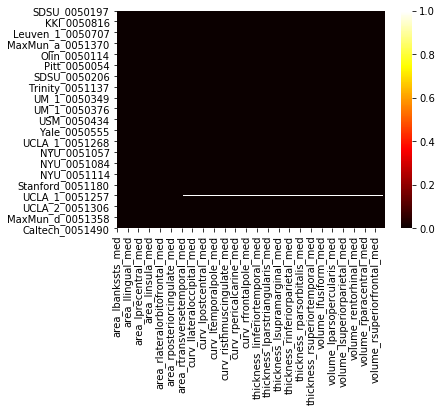

In [113]:
sns.heatmap(df_td.isna(), cmap='hot')
print(df_td.shape)
df_td.dropna(axis=0, inplace=True)
print(df_td.shape)

(441, 547)
(434, 547)


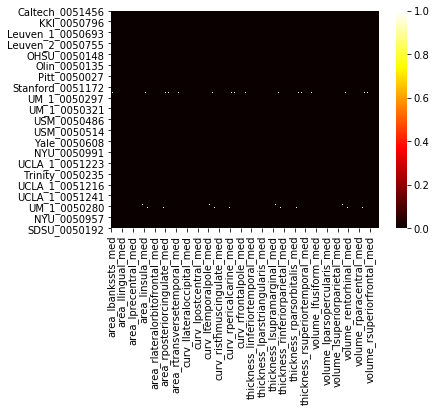

In [114]:
sns.heatmap(df_asd.isna(), cmap='hot')
print(df_asd.shape)
df_asd.dropna(axis=0, inplace=True)
print(df_asd.shape)

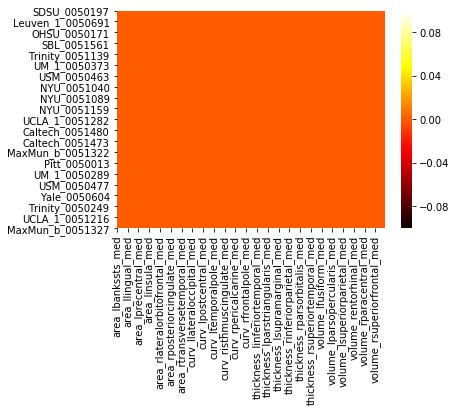

In [127]:
df = pd.concat([df_td, df_asd], axis=0)
df = df.astype('float')
sns.heatmap(df.isna(), cmap='hot')

In [116]:
def createUpdateFeates(df):
    new_cols = []
    old_cols = df.columns.drop(['age','sex','labels']).to_list()
    old_new_dict = {}
    for ind in range(0, len(old_cols), 2):
        if old_cols[ind] in ['age', 'sex', 'labels']:
            new_cols.append(old_cols[ind])
            continue
        feat_name = old_cols[ind].split('_')[:2]
        new_name1 = '_'.join(feat_name)+'_medMIQR'
        new_name2 = '_'.join(feat_name)+'_medPIQR'
        new_cols.append(new_name1)
        new_cols.append(new_name2)
        
    new_cols.append('age')
    new_cols.append('sex')
    new_cols.append('labels')
    return new_cols

def testNewFeats(old_cols, new_cols):
    assert(len(old_cols)==len(new_cols))
    for ind in range(len(old_cols)):
        old_name = old_cols[ind].split('_')[:2]
        new_name = new_cols[ind].split('_')[:2]
        assert(old_name==new_name)

new_cols = createUpdateFeates(df)
testNewFeats(df.columns.to_list(), new_cols)

In [117]:
def getFeatFromMorphBrain(morph_brain, columns):
    feats = []
    for col in columns:
        if morph_brain in col:
            feats.append(col)
    return feats

In [118]:
updated_df = pd.DataFrame(None, index=df.index, columns=new_cols)
for subj in updated_df.index:
    for col in updated_df.columns:
        if 'medMIQR' in col:
            morph_brain = col.split('_')[:2]
            morph_brain = '_'.join(morph_brain)
            feats = getFeatFromMorphBrain(morph_brain, df.columns.to_list())
            assert(len(feats)==2)
            assert('med' in feats[0])
            assert('range' in feats[1])
            updated_df.loc[subj, col] = df.loc[subj, feats[0]]-df.loc[subj, feats[1]]
        elif 'medPIQR' in col:
            updated_df.loc[subj, col] = df.loc[subj, feats[0]]+df.loc[subj, feats[1]]

        else:
            updated_df.loc[subj, col] = df.loc[subj, col]

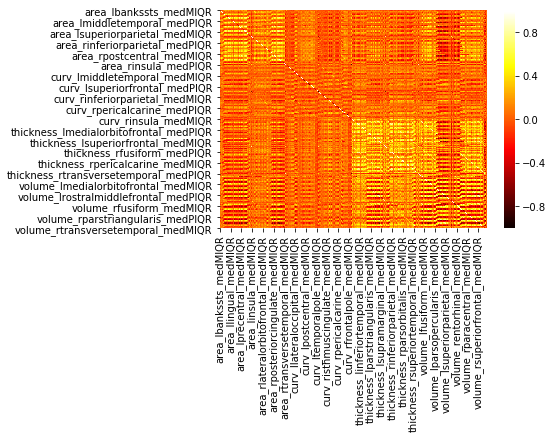

In [128]:
updated_df = updated_df.astype(float)
sns.heatmap(updated_df.corr(), cmap='hot')

In [129]:
def extract_lr_hemispheres(updated_df):
    cols = updated_df.columns.drop(['age', 'sex', 'labels']).to_list()
    left_cols = []
    right_cols = []
    for col in cols:
        isleft = col.split('_')[1][0]=='l'
        if isleft:
            left_cols.append(col)
        else:
            right_cols.append(col)
    return left_cols, right_cols

In [130]:
left_cols, right_cols = extract_lr_hemispheres(updated_df)
left_cols.append('age')
left_cols.append('sex')
left_cols.append('labels')
right_cols.append('age')
right_cols.append('sex')
right_cols.append('labels')

In [131]:
updated_left_df = updated_df.loc[:, left_cols]
updated_right_df = updated_df.loc[:, right_cols]

In [132]:
(updated_left_df-updated_right_df).sum().sum()

0.0

In [133]:
left_cols, right_cols = extract_lr_hemispheres(df)
left_cols.append('age')
left_cols.append('sex')
left_cols.append('labels')
right_cols.append('age')
right_cols.append('sex')
right_cols.append('labels')

In [134]:
left_df = df.loc[:, left_cols]
right_df = df.loc[:, right_cols]

In [135]:
(right_df-left_df).sum().sum()

0.0

In [136]:
updated_right_df
updated_right_df.loc[df_asd.index,'labels']=1
updated_right_df.to_csv('D:/PhD/Data/aparc/right_modifiedfeats.csv')

In [137]:
updated_left_df
updated_left_df.loc[df_asd.index,'labels']=1
updated_left_df.to_csv('D:/PhD/Data/aparc/left_modifiedfeats.csv')

In [138]:
updated_df
updated_df.loc[df_asd.index,'labels']=1
updated_df.to_csv('D:/PhD/Data/aparc/left_right_modifiedfeats.csv')

# Split data based on sites, age, labels (balanced vs unbalanced)

In [3]:
updated_left_df = pd.read_csv('D:/PhD/Data/aparc/left_modifiedfeats.csv', index_col=0)
updated_left_df

,area_lbankssts_medMIQR,area_lbankssts_medPIQR,area_lcaudalanteriorcingulate_medMIQR,area_lcaudalanteriorcingulate_medPIQR,area_lcaudalmiddlefrontal_medMIQR,area_lcaudalmiddlefrontal_medPIQR,area_lcuneus_medMIQR,area_lcuneus_medPIQR,area_lentorhinal_medMIQR,area_lentorhinal_medPIQR,...,volume_lfrontalpole_medPIQR,volume_ltemporalpole_medMIQR,volume_ltemporalpole_medPIQR,volume_ltransversetemporal_medMIQR,volume_ltransversetemporal_medPIQR,volume_linsula_medMIQR,volume_linsula_medPIQR,age,sex,labels
SDSU_0050197,0.163445,1.196471,0.096233,1.347606,0.126497,1.261955,0.041787,1.276613,0.094346,1.312297,...,6.207416,-1.512488,5.973953,0.081625,2.927005,-1.739092,2.404540,14.98,1.0,0.0
CMU_b_0050657,0.221886,1.259661,0.072883,1.205236,0.114949,1.194420,0.058186,1.156168,0.200588,1.173668,...,6.501540,-1.622933,7.864570,0.140143,3.240898,-1.728228,2.355275,21.00,1.0,0.0
CMU_b_0050658,0.201345,1.176050,0.125207,1.187152,0.161095,1.203406,0.083877,1.129644,0.206600,1.194187,...,4.887912,0.127398,6.169409,0.002778,2.850906,-1.603819,2.600133,27.00,1.0,0.0
CMU_b_0050661,0.223667,1.198427,0.100287,1.199000,0.126055,1.224432,0.088972,1.115356,0.163220,1.177905,...,7.003874,-1.300370,8.472240,0.137959,2.536413,-1.726738,2.335252,20.00,2.0,0.0
CMU_b_0050667,0.159022,1.209473,0.071165,1.215978,0.143244,1.158907,0.061148,1.124297,0.236280,1.232692,...,4.830817,-0.143113,7.584634,0.130124,2.677534,-1.763983,2.078961,40.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDSU_0050188,0.277527,1.173527,0.145993,1.234163,0.197020,1.162350,0.067041,1.264902,0.159653,1.245911,...,6.180367,-0.877149,6.425520,-0.088836,3.396011,-1.700360,2.860033,15.40,1.0,1.0
SDSU_0050189,0.092146,1.318882,0.056030,1.329596,0.177706,1.201359,0.032010,1.353047,0.180940,1.239434,...,5.795765,-0.741955,5.805669,-0.031276,3.544260,-2.024735,2.024735,16.64,1.0,1.0
SDSU_0050190,0.207070,1.233156,0.159571,1.258687,0.075005,1.315045,0.041934,1.250350,0.048863,1.334485,...,10.297325,-1.054644,6.084448,0.225147,4.387629,-2.068555,2.231282,13.99,1.0,1.0
SDSU_0050191,0.241580,1.166883,0.246099,1.283126,0.121498,1.253392,0.079004,1.285999,0.159147,1.195555,...,5.242925,-1.265826,7.628535,0.069582,3.413986,-2.151395,2.696521,12.63,1.0,1.0


In [5]:
# Get site names from the dataset
ids = updated_left_df.index.to_list()
sites = []
for id in ids:
    sites.append(id.split('_')[0])
sites = np.unique(sites)
sites, len(sites)

(array(['CMU', 'Caltech', 'KKI', 'Leuven', 'MaxMun', 'NYU', 'OHSU', 'Olin',
        'Pitt', 'SBL', 'SDSU', 'Stanford', 'Trinity', 'UCLA', 'UM', 'USM',
        'Yale'], dtype='<U8'),
 17)

In [7]:
from collections import defaultdict
# Create a dictionary with keys (sites), values (subjects within each site -> list)
sites_subjs_dict = defaultdict(list)
for id in updated_left_df.index:
    site_name = id.split('_')[0]
    sites_subjs_dict[site_name].append(id)

sites_age = {}
sites_gender = {}
sites_labels = {}
for site in sites_subjs_dict:
    subjects = sites_subjs_dict[site]
    df_site = updated_left_df.loc[subjects, :]
    sites_age[site] = (df_site['age'].mean(), df_site['age'].std(), np.median(df_site['age']))
    sites_gender[site] = {'M':(df_site['sex']==1).sum(), 'F':(df_site['sex']==2).sum()}
    sites_labels[site] = {'TD':(df_site['labels']==0).sum(), 'ASD':(df_site['labels']==1).sum()}


In [8]:
sites_age

{'SDSU': (14.412777777777778, 1.8382299111779261, 14.445),
 'CMU': (26.59259259259259, 5.685739646487106, 27.0),
 'KKI': (9.97529411764706, 1.1891535958444575, 9.895),
 'Leuven': (18.0, 4.993511919513418, 16.6),
 'NYU': (15.409007246376813, 6.380078097703336, 14.004999999999999),
 'OHSU': (10.709230769230768, 1.791343458026792, 10.395),
 'Pitt': (18.941964285714285, 6.934278075983465, 16.99),
 'MaxMun': (25.431372549019606, 11.968717394877004, 26.0),
 'Olin': (16.58823529411765, 3.465130607174452, 16.5),
 'SBL': (33.733333333333334, 6.605913656572817, 36.0),
 'Trinity': (16.955531914893616, 3.46936017689181, 15.91),
 'UM': (14.058955223880597, 3.245059001434651, 13.9),
 'USM': (22.694681690140847, 8.34471552330849, 19.7591),
 'Yale': (12.713928571428571, 2.8763118294544734, 12.75),
 'Stanford': (10.003028947368417, 1.603789058028803, 9.62015),
 'UCLA': (13.035789473684206, 2.2397005778923713, 13.0),
 'Caltech': (27.721621621621622, 10.445789559411942, 22.9)}

In [9]:
sites_gender

{'SDSU': {'M': 29, 'F': 7},
 'CMU': {'M': 21, 'F': 6},
 'KKI': {'M': 24, 'F': 10},
 'Leuven': {'M': 55, 'F': 8},
 'NYU': {'M': 106, 'F': 32},
 'OHSU': {'M': 26, 'F': 0},
 'Pitt': {'M': 48, 'F': 8},
 'MaxMun': {'M': 47, 'F': 4},
 'Olin': {'M': 29, 'F': 5},
 'SBL': {'M': 15, 'F': 0},
 'Trinity': {'M': 47, 'F': 0},
 'UM': {'M': 107, 'F': 27},
 'USM': {'M': 71, 'F': 0},
 'Yale': {'M': 40, 'F': 16},
 'Stanford': {'M': 30, 'F': 8},
 'UCLA': {'M': 83, 'F': 12},
 'Caltech': {'M': 29, 'F': 8}}

In [10]:
sites_labels

{'SDSU': {'TD': 22, 'ASD': 14},
 'CMU': {'TD': 13, 'ASD': 14},
 'KKI': {'TD': 26, 'ASD': 8},
 'Leuven': {'TD': 34, 'ASD': 29},
 'NYU': {'TD': 100, 'ASD': 38},
 'OHSU': {'TD': 14, 'ASD': 12},
 'Pitt': {'TD': 27, 'ASD': 29},
 'MaxMun': {'TD': 28, 'ASD': 23},
 'Olin': {'TD': 15, 'ASD': 19},
 'SBL': {'TD': 15, 'ASD': 0},
 'Trinity': {'TD': 25, 'ASD': 22},
 'UM': {'TD': 73, 'ASD': 61},
 'USM': {'TD': 25, 'ASD': 46},
 'Yale': {'TD': 28, 'ASD': 28},
 'Stanford': {'TD': 19, 'ASD': 19},
 'UCLA': {'TD': 42, 'ASD': 53},
 'Caltech': {'TD': 18, 'ASD': 19}}

In [11]:
# Removing unbalanced sites
sites_2_remove =['KKI', 'NYU', 'SBL','USM']

In [12]:
# Rerun the previous scripts with excluding unbalanced sites
# Create a dictionary with keys (sites), values (subjects within each site -> list)
sites_subjs_dict = defaultdict(list)
for id in updated_left_df.index:
    site_name = id.split('_')[0]
    sites_subjs_dict[site_name].append(id)

sites_age = {}
sites_gender = {}
sites_labels = {}
for site in sites_subjs_dict:
    if site in sites_2_remove:
        continue
    subjects = sites_subjs_dict[site]
    df_site = updated_left_df.loc[subjects, :]
    sites_age[site] = (df_site['age'].mean(), df_site['age'].std(), np.median(df_site['age']))
    sites_gender[site] = {'M':(df_site['sex']==1).sum(), 'F':(df_site['sex']==2).sum()}
    sites_labels[site] = {'TD':(df_site['labels']==0).sum(), 'ASD':(df_site['labels']==1).sum()}

In [13]:
sites_age

{'SDSU': (14.412777777777778, 1.8382299111779261, 14.445),
 'CMU': (26.59259259259259, 5.685739646487106, 27.0),
 'Leuven': (18.0, 4.993511919513418, 16.6),
 'OHSU': (10.709230769230768, 1.791343458026792, 10.395),
 'Pitt': (18.941964285714285, 6.934278075983465, 16.99),
 'MaxMun': (25.431372549019606, 11.968717394877004, 26.0),
 'Olin': (16.58823529411765, 3.465130607174452, 16.5),
 'Trinity': (16.955531914893616, 3.46936017689181, 15.91),
 'UM': (14.058955223880597, 3.245059001434651, 13.9),
 'Yale': (12.713928571428571, 2.8763118294544734, 12.75),
 'Stanford': (10.003028947368417, 1.603789058028803, 9.62015),
 'UCLA': (13.035789473684206, 2.2397005778923713, 13.0),
 'Caltech': (27.721621621621622, 10.445789559411942, 22.9)}

In [14]:
age_close_sites = {14:{'SDSU','UCLA','UM'},
                   10:{'Stanford','OHSU'},
                   26:{'CMU','MaxMun','Caltech'},
                   16: {'Trinity', 'Olin'},
                   18:{'Pitt','Leuvin'},
                   12:{'Yale'}
                  }

# Create data matrices based on the site/age/balance split

In [15]:
data_matrices = defaultdict(dict)
ids = updated_left_df.index.to_list()
for age in age_close_sites:
    sites = age_close_sites[age]
    sites_subjs = []
    for site in sites:
        part1 = site.split('_')[0]
        inds = np.where([part1 in id for id in ids])[0]
        data_matrices[age][site] = updated_left_df.iloc[inds]
        

In [18]:
import joblib
joblib.dump(data_matrices, os.path.join(data_dir, 'data_matrix_age_site_dict.joblib'))

['D:/PhD/Data/aparc/data_matrix_age_site_dict.joblib']

# Perform some machine learning on the great data matrix we have

In [235]:
if 'data_matrices' not in locals():
    import joblib
    data_matrices = joblib.load('D:/PhD/Data/aparc/data_matrix_age_site_dict.joblib')

In [236]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score
import json

In [237]:
# Create aggregated dataframe based on age
age_df = {}
site_dict = data_matrices[14]
df = site_dict['SDSU']
cols = df.columns

for age in data_matrices:
    agg_df = pd.DataFrame(None, columns=cols)
    site_dict = data_matrices[age]
    for site in site_dict:
        df = site_dict[site]
        agg_df = pd.concat([agg_df, df], axis=0)
    age_df[age] = agg_df


In [238]:
for age in age_df:
    print(age_df[age].shape)

(265, 275)
(64, 275)
(115, 275)
(81, 275)
(56, 275)
(56, 275)


In [258]:
def prepare_data_4_ML_Pipeline(df, normalization_method='minmax01'): # Normalization_method=['std','minmax01','minmax_11']
    if 'age' in df.columns:
        df_noage = df.drop('age', axis=1)
    else:
        df_noage = df
    
    if 'sex' in df.columns:
        df_noage_nosex = df_noage.drop('sex', axis=1)
    else:
        df_noage_nosex = df_noage
    
    columns = df_noage_nosex.columns
    X = df_noage_nosex.drop('labels', axis=1).values
    y = df_noage_nosex['labels'].values
    if normalization_method == 'minmax01':
        sc = MinMaxScaler(feature_range=(0,1))
    elif normalization_method == 'minmax_11':
        sc = MinMaxScaler(feature_range=(-1,1))
    elif normalization_method == 'std':
        sc = StandardScaler()
    else:
        raise ValueError(f'normalization_method should only be one of those minmax01, minmax_11, std')
        
    ss = StratifiedShuffleSplit(n_splits=10, train_size=0.8, random_state=1234)
    return X, y, sc, ss, columns
    
    
def select_feature(X, y, sc, ss, columns, age, norm_meth):
    split_results_rf = {}
    split_results_svm = {}
    cnt = 0
    for train_ind, test_ind in ss.split(X, y):
        # Split
        if not (cnt==0 and age == 10):
            continue
        Xtrain, Xtest = X[train_ind], X[test_ind]
        ytrain, ytest = y[train_ind], y[test_ind]
        
        # Normalize
        Xtrain = sc.fit_transform(Xtrain)
        Xtest = sc.transform(Xtest)
        
        # Initialize RFE
        linsvm = LinearSVC(max_iter=1000000)
        rf = RandomForestClassifier(n_estimators=300)
        rfesvm = RFE(linsvm, verbose=53)
        rferf = RFE(rf, verbose=53)
        
        # Fit rfe
        selectorsvm = rfesvm.fit(Xtrain, ytrain)
        selectorrf = rferf.fit(Xtrain, ytrain)
        
        # Parse the selected feats
        selected_svm_feats_indx = np.where(selectorsvm.ranking_==1)[0]
        selected_rf_feats_indx = np.where(selectorrf.ranking_==1)[0]
        
        # Test on Test set
        Xtest_selected_svm = Xtest[:, selected_svm_feats_indx]
        Xtest_selected_rf = Xtest[:, selected_rf_feats_indx]
        Xtrain_selected_svm = Xtrain[:, selected_svm_feats_indx]
        Xtrain_selected_rf = Xtrain[:, selected_rf_feats_indx]
        
        train_res_svm, test_res_svm  = create_ML_pipeline(Xtrain_selected_svm, Xtest_selected_svm, ytrain, ytest)
        train_res_rf, test_res_rf = create_ML_pipeline(Xtrain_selected_rf, Xtest_selected_rf, ytrain, ytest)
        
                
        selected_feats_svm = tuple(columns[selected_svm_feats_indx])
        selected_feats_rf = tuple(columns[selected_rf_feats_indx])
        train_res_svm['feats'] = selected_feats_svm
        test_res_svm['feats'] = selected_feats_svm

        train_res_rf['feats'] = selected_feats_rf
        train_res_rf['feats'] = selected_feats_rf
        all_results_dict = {
            'train_svm': train_res_svm,
            'test_svm': test_res_svm,
            'train_rf': train_res_rf,
            'test_rf': test_res_rf, 
        }
        
        with open(f'./Results/Data_wrangler_FS_ML/cnt_{cnt}_age_{age}_norm_{norm_meth}_RFERF.json', 'w') as jsonfile:
            json.dump(all_results_dict, jsonfile)

        
        if selected_feats_rf not in split_results_rf:
            split_results_rf[selected_feats_rf] = [{
                'train': train_res_rf,
                'test': test_res_rf
            }
            ]
            
        else:
            split_results_rf[selected_feats_rf].append({
                'train': train_res_rf,
                'test': test_res_rf
            })
            
        
        if selected_feats_svm not in split_results_svm:
            split_results_svm[selected_feats_svm] = [{
                'train': train_res_svm,
                'test': test_res_svm
            }
            ]
            
        else:
            split_results_svm[selected_feats_svm].append({
                'train': train_res_svm,
                'test': test_res_svm
            })
        
        cnt += 1

        
    return split_results_rf, split_results_svm


def predict_clc(clc, X, y, metric):
    yhat = np.round(clc.predict(X))
    acc = metric(y, yhat)
    return acc


def create_ML_pipeline(Xtrain, Xtest, ytrain, ytest):
        rf_clc = RandomForestClassifier(n_estimators=300)
        linsvm_clc = LinearSVC(max_iter=1000000)
        svmrbf_clc = SVC(max_iter=10000000)
        svmpoly4nd_clc = SVC(kernel='poly', degree=4, max_iter=9999999)
        dt_clc = DecisionTreeClassifier()
        lg_clc = LogisticRegression(max_iter=99999999)
        rdg_clc = RidgeClassifier(max_iter=99999999)
        lso_clc = Lasso(max_iter=9999999)
        
        rf_clc = rf_clc.fit(Xtrain, ytrain)
        rf_train_acc = predict_clc(rf_clc, Xtrain, ytrain, balanced_accuracy_score)
        rf_test_acc = predict_clc(rf_clc, Xtest, ytest, balanced_accuracy_score)

        linsvm_clc = linsvm_clc.fit(Xtrain, ytrain)
        linsvm_train_acc = predict_clc(linsvm_clc, Xtrain, ytrain, balanced_accuracy_score)
        linsvm_test_acc = predict_clc(linsvm_clc, Xtest, ytest, balanced_accuracy_score)

        svmrbf_clc = svmrbf_clc.fit(Xtrain, ytrain)
        svmrbf_train_acc = predict_clc(svmrbf_clc, Xtrain, ytrain, balanced_accuracy_score)
        svmrbf_test_acc = predict_clc(svmrbf_clc, Xtest, ytest, balanced_accuracy_score)

        svmpoly4nd_clc = svmpoly4nd_clc.fit(Xtrain, ytrain)
        svmpoly4nd_train_acc = predict_clc(svmpoly4nd_clc, Xtrain, ytrain, balanced_accuracy_score)
        svmpoly4nd_test_acc = predict_clc(svmpoly4nd_clc, Xtest, ytest, balanced_accuracy_score)

        dt_clc = dt_clc.fit(Xtrain, ytrain)
        dt_train_acc = predict_clc(dt_clc, Xtrain, ytrain, balanced_accuracy_score)
        dt_test_acc = predict_clc(dt_clc, Xtest, ytest, balanced_accuracy_score)

        lg_clc = lg_clc.fit(Xtrain, ytrain)
        lg_train_acc = predict_clc(lg_clc, Xtrain, ytrain, balanced_accuracy_score)
        lg_test_acc = predict_clc(lg_clc, Xtest, ytest, balanced_accuracy_score)

        rdg_clc = rdg_clc.fit(Xtrain, ytrain)
        rdg_train_acc = predict_clc(rdg_clc, Xtrain, ytrain, balanced_accuracy_score)
        rdg_test_acc = predict_clc(rdg_clc, Xtest, ytest, balanced_accuracy_score)

        lso_clc = lso_clc.fit(Xtrain, ytrain)
        lso_train_acc = predict_clc(lso_clc, Xtrain, ytrain, balanced_accuracy_score)
        lso_test_acc = predict_clc(lso_clc, Xtest, ytest, balanced_accuracy_score)
        
        train_results = {
            'rf':rf_train_acc,
            'lsvm':linsvm_train_acc,
            'rsvm':svmrbf_train_acc,
            'psvm':svmpoly4nd_train_acc,
            'dt':dt_train_acc,
            'lg':lg_train_acc,
            'rdg':rdg_train_acc,
            'lso':lso_train_acc,
        }
        test_results = {
            'rf':rf_test_acc,
            'lsvm':linsvm_test_acc,
            'rsvm':svmrbf_test_acc,
            'psvm':svmpoly4nd_test_acc,
            'dt':dt_test_acc,
            'lg':lg_test_acc,
            'rdg':rdg_test_acc,
            'lso':lso_test_acc,
        }
        
        return train_results, test_results
        

In [259]:
if not os.path.isfile('D:/PhD/Data/aparc/age_split_dict.joblib'):
    joblib.dump(age_df, 'D:/PhD/Data/aparc/age_split_dict.joblib')
else:
    age_df = joblib.load('D:/PhD/Data/aparc/age_split_dict.joblib')

In [261]:
norm_meth = 'minmax01'
for age in age_df:
    df = age_df[age]
    print(f"Age {age}: data matrix shape{df.shape}")
    
    X, y, sc, ss, columns = prepare_data_4_ML_Pipeline(df, normalization_method=norm_meth)
    split_results_rf, split_results_svm = select_feature(X, y, sc, ss, columns, age, norm_meth)
    joblib.dump(split_results_rf, f'./Results/Data_wrangler_FS_ML/age_{age}_norm_{norm_meth}_RFERF.joblib')
    joblib.dump(split_results_svm, f'./Results/Data_wrangler_FS_ML/age_{age}_norm_{norm_meth}_RFESVM.joblib')

Age 14: data matrix shape(265, 275)
Age 10: data matrix shape(64, 275)
Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitt

Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
F

# Analyze the ML results (Json files)


In [24]:
results_dir = 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML'
json_files = [os.path.join(results_dir,file) for file in os.listdir(results_dir) if '.json' in file]
json_files

['D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_10_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_10_norm_std_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_12_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_14_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_16_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_18_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_0_age_26_norm_minmax01_RFERF.json',
 'D:\\PhD\\codes\\LabtopWork\\September2020\\2brains\\Results\\Data_wrangler_FS_ML\\cnt_1_age_10_norm_minmax01_RFERF.json',
 'D:\\PhD\\co

In [25]:
sample = json_files[2]
kfold_ind = sample.split('\\')[-1].split('_')[1]
age_group = sample.split('\\')[-1].split('_')[3]
kfold_ind, age_group

('0', '12')

In [26]:
# 
def _group_age_result_dict(big_dict, train_svm_dict, test_svm_dict, train_rf_dict, test_rf_dict, age_group):
    
    if int(age_group) not in train_svm_dict:
        train_svm_dict[int(age_group)] = [big_dict['train_svm']]
    else:
        train_svm_dict[int(age_group)].append(big_dict['train_svm'])

    if int(age_group) not in test_svm_dict:
        test_svm_dict[int(age_group)] = [big_dict['test_svm']]
    else:
        test_svm_dict[int(age_group)].append(big_dict['test_svm'])

    if int(age_group) not in train_rf_dict:
        train_rf_dict[int(age_group)] = [big_dict['train_rf']]
    else:
        train_rf_dict[int(age_group)].append(big_dict['train_rf'])

    if int(age_group) not in test_rf_dict:
        test_rf_dict[int(age_group)] = [big_dict['test_rf']]
    else:
        test_rf_dict[int(age_group)].append(big_dict['test_rf'])
    
    return train_svm_dict, test_svm_dict, train_rf_dict, test_rf_dict


# Read all results json files
def parse_json_results():
    age_results_train_svm = dict()
    age_results_test_svm = dict()

    age_results_train_rf = dict()
    age_results_test_rf = dict()

    for ind, file in enumerate(json_files):
        kfold_ind = file.split('\\')[-1].split('_')[1]
        age_group = file.split('\\')[-1].split('_')[3]
        with open(json_files[ind], 'r') as file:
            kfold_age_dict = json.loads(file.read())
                
        age_results_train_svm, age_results_test_svm, age_results_train_rf, age_results_test_rf = _group_age_result_dict(kfold_age_dict, age_results_train_svm, age_results_test_svm, age_results_train_rf, age_results_test_rf, age_group)
    return age_results_train_svm, age_results_test_svm, age_results_train_rf, age_results_test_rf

In [27]:
age_results_train_svm, age_results_test_svm, age_results_train_rf, age_results_test_rf = parse_json_results()

In [28]:
from collections import defaultdict
def parse_allfolds_results(age_results_dict):
    age_results = {}
    for age in age_results_dict:
        folds_list = age_results_dict[age]
        age_results[age]=defaultdict(list)
        for fold_results in folds_list:
            for key in fold_results:
                age_results[age][key].append(fold_results[key])

    return age_results

In [31]:
age_results_train_svm.keys()

dict_keys([10, 12, 14, 16, 18, 26])

In [32]:
age_results_train_svm[10][0].keys()
clc = ['rf', 'lsvm', 'rsvm', 'psvm', 'dt', 'lg', 'rdg', 'lso']

In [33]:
train_svm_resss = parse_allfolds_results(age_results_train_svm)
test_svm_resss = parse_allfolds_results(age_results_test_svm)

In [34]:
results_train_10 = train_svm_resss[26]
results_test_10 = test_svm_resss[26]

In [35]:
x = []
avg_train_res = {}
avg_test_res = {}
std_test_res = {}
for ind, cl in enumerate(clc):
    avg_train_res[cl] = np.mean(results_train_10[cl])
    avg_test_res[cl] = np.mean(results_test_10[cl])
    std_test_res[cl] = np.std(results_test_10[cl], ddof=1)

    x.append(ind*0.25)

x, avg_train_res, avg_test_res, std_test_res


([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
 {'rf': 1.0,
  'lsvm': 1.0,
  'rsvm': 0.99,
  'psvm': 1.0,
  'dt': 1.0,
  'lg': 0.9877777777777779,
  'rdg': 1.0,
  'lso': 0.5},
 {'rf': 0.556060606060606,
  'lsvm': 0.5193181818181818,
  'rsvm': 0.5446969696969697,
  'psvm': 0.5049242424242424,
  'dt': 0.5462121212121211,
  'lg': 0.4882575757575758,
  'rdg': 0.5053030303030304,
  'lso': 0.5},
 {'rf': 0.11225024425347956,
  'lsvm': 0.059045836647692425,
  'rsvm': 0.07106241876317905,
  'psvm': 0.07613646833166997,
  'dt': 0.13230250820825776,
  'lg': 0.072101376965707,
  'rdg': 0.0458456796683241,
  'lso': 0.0})

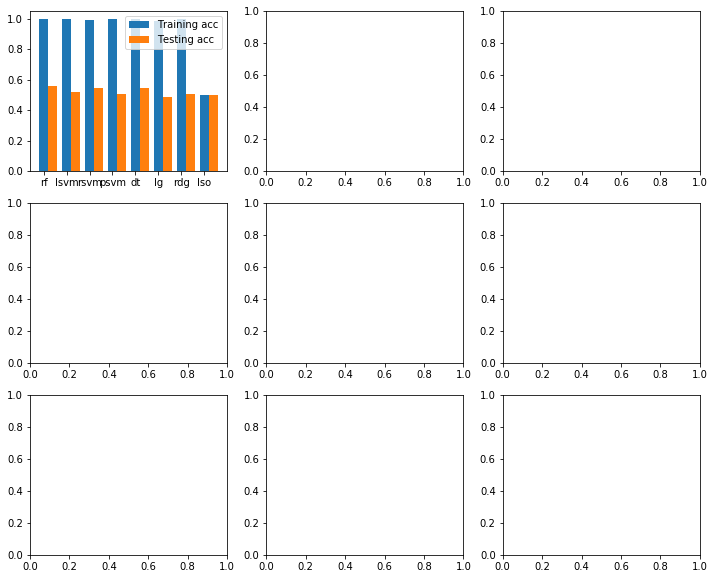

In [41]:
fig, axes = plt.subplots(3,3,figsize=(12,10))
heights_train = [avg_train_res[key] for key in avg_train_res]
heights_test = [avg_test_res[key] for key in avg_test_res]
axes[0][0].bar(x=x, height=heights_train, width=0.1, label='Training acc')
axes[0][0].bar(x=np.array(x)+0.1, height=heights_test, width=0.1, label='Testing acc')
axes[0][0].set_xticks(x)
axes[0][0].set_xticklabels(clc)
axes[0][0].legend()

<BarContainer object of 2 artists>

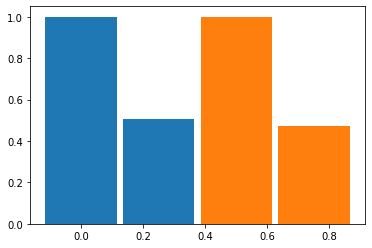

In [332]:
plt.bar(x=[0,0.25], height=[np.mean(train_svm_resss[10]['rf']), np.mean(test_svm_resss[10]['rf'])], width=0.23)
plt.bar(x=[0.5,0.75], height=[np.mean(train_svm_resss[10]['lsvm']), np.mean(test_svm_resss[10]['lsvm'])], width=0.23)